# This notebook contain working on Rajshahi dataset Feature engineering and Model development Analysis using
### - Timeseries


In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.1


## Import liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Model, Sequential
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError


from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Ridge, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.layers import Dense, Conv1D, LSTM, RNN

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams["figure.figsize"] = (9,6)

In [4]:
# Set the Randomseed 
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

#### Read the dataset & convert datetime into datetime and set index as datetime

In [5]:
rajshahi_df_raw = pd.read_csv("../data/Rajshahi_Weather_combined.csv")
rajshahi_df_raw['datetime'] = pd.to_datetime(rajshahi_df_raw['datetime'], format='%d-%m-%Y') # Convert 'datetime' column to datetime type
rajshahi_df_raw.set_index('datetime', inplace=True)  # Set 'datetime' column as the index


In [6]:
rajshahi_df_raw.head()

,Unnamed: 0_x,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,temperature_2m_min,temperature_2m_mean,apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,et0_fao_evapotranspiration
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0,Rajshahi,80.1,58.4,67.9,79.8,58.4,67.9,54.1,63.7,...,16.1,19.5,22.9,16.5,19.2,0.5,0.5,2,13.0,2.25
2012-01-02,1,Rajshahi,73.7,61.2,65.2,73.7,61.2,65.2,57.8,78.2,...,15.6,17.4,21.5,16.4,18.2,5.2,5.2,11,9.8,1.32
2012-01-03,2,Rajshahi,77.3,58.6,66.2,77.3,58.6,66.2,57.5,75.8,...,15.1,17.7,22.5,15.9,19.0,1.0,1.0,4,8.7,1.31
2012-01-04,3,Rajshahi,77.8,55.5,66.0,77.8,55.5,66.0,55.2,70.4,...,15.2,18.3,21.9,16.1,19.1,0.0,0.0,0,8.0,1.87
2012-01-05,4,Rajshahi,79.1,53.0,67.0,79.1,53.0,67.0,56.2,69.9,...,13.5,18.2,22.8,13.4,18.9,0.0,0.0,0,7.1,1.66


In [7]:
rajshahi_df_raw.columns

Index(['Unnamed: 0_x', 'name', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'river_discharge', 'Unnamed: 0',
       'weathercode ', 'temperature_2m_max ', 'temperature_2m_min ',
       'temperature_2m_mean', 'apparent_temperature_max (°C)',
       'apparent_temperature_min (°C)', 'apparent_temperature_mean',
       'precipitation_sum ', 'rain_sum ', 'precipitation_hours',
       'windspeed_10m_max ', 'et0_fao_evapotranspiration'],
      dtype='object')

# Drop the not required columns

In [8]:
rajshahi_df_raw.drop(columns=['Unnamed: 0_x', 'name', 'snow','preciptype',
       'snowdepth', 'windgust','severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'Unnamed: 0.1', 'Unnamed: 0_y','Unnamed: 0', 'weathercode ', 'temperature_2m_max ',
       'temperature_2m_min ', 'temperature_2m_mean','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)','windspeed_10m_max '],axis=1,inplace=True)
      

In [9]:
rajshahi_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4247 entries, 2012-01-01 to 2023-08-17
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tempmax                     4247 non-null   float64
 1   tempmin                     4247 non-null   float64
 2   temp                        4247 non-null   float64
 3   feelslikemax                4247 non-null   float64
 4   feelslikemin                4247 non-null   float64
 5   feelslike                   4247 non-null   float64
 6   dew                         4247 non-null   float64
 7   humidity                    4247 non-null   float64
 8   precip                      4247 non-null   float64
 9   precipprob                  4247 non-null   int64  
 10  precipcover                 4247 non-null   float64
 11  windspeed                   4247 non-null   float64
 12  winddir                     4247 non-null   float64
 13  sealevelpressur

In [21]:
rajshahi_df_raw.columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'river_discharge',
       'apparent_temperature_mean', 'precipitation_sum ', 'rain_sum ',
       'precipitation_hours', 'et0_fao_evapotranspiration'],
      dtype='object')

In [14]:
# To crosscheck customer_id = u16546 made how many transactions made by him and cancelled
rajshahi_df_raw.precip

datetime
2012-01-01    0.000
2012-01-02    0.096
2012-01-03    0.032
2012-01-04    0.000
2012-01-05    0.008
              ...  
2023-08-13    0.285
2023-08-14    0.183
2023-08-15    0.000
2023-08-16    0.114
2023-08-17    0.166
Name: precip, Length: 4247, dtype: float64

In [15]:
rajshahi_df_raw.river_discharge

datetime
2012-01-01     3364.12
2012-01-02     3333.26
2012-01-03     3317.94
2012-01-04     3279.95
2012-01-05     3205.27
                ...   
2023-08-13    39083.09
2023-08-14    39901.48
2023-08-15    40830.95
2023-08-16    41019.40
2023-08-17    40270.71
Name: river_discharge, Length: 4247, dtype: float64

#### Check the Missing values

In [24]:
rajshahi_df_raw.isnull().sum()

tempmax                        0
tempmin                        0
temp                           0
feelslikemax                   0
feelslikemin                   0
feelslike                      0
dew                            0
humidity                       0
precip                         0
precipprob                     0
precipcover                    0
windspeed                      0
winddir                        0
sealevelpressure              72
cloudcover                     0
visibility                    72
solarradiation                 0
solarenergy                    0
uvindex                        0
river_discharge                0
apparent_temperature_mean      0
precipitation_sum              0
rain_sum                       0
precipitation_hours            0
et0_fao_evapotranspiration     0
dtype: int64

In [25]:
rajshahi_df_raw['sealevelpressure']

datetime
2012-01-01    1015.0
2012-01-02    1015.4
2012-01-03    1014.0
2012-01-04    1014.7
2012-01-05    1015.6
               ...  
2023-08-13    1002.8
2023-08-14    1003.8
2023-08-15    1003.4
2023-08-16    1003.1
2023-08-17    1002.5
Name: sealevelpressure, Length: 4247, dtype: float64

### Use fillna method 

In [26]:
df = rajshahi_df_raw.fillna(method='ffill')

In [27]:
df.isnull().sum()

tempmax                       0
tempmin                       0
temp                          0
feelslikemax                  0
feelslikemin                  0
feelslike                     0
dew                           0
humidity                      0
precip                        0
precipprob                    0
precipcover                   0
windspeed                     0
winddir                       0
sealevelpressure              0
cloudcover                    0
visibility                    0
solarradiation                0
solarenergy                   0
uvindex                       0
river_discharge               0
apparent_temperature_mean     0
precipitation_sum             0
rain_sum                      0
precipitation_hours           0
et0_fao_evapotranspiration    0
dtype: int64

### Data Visualization

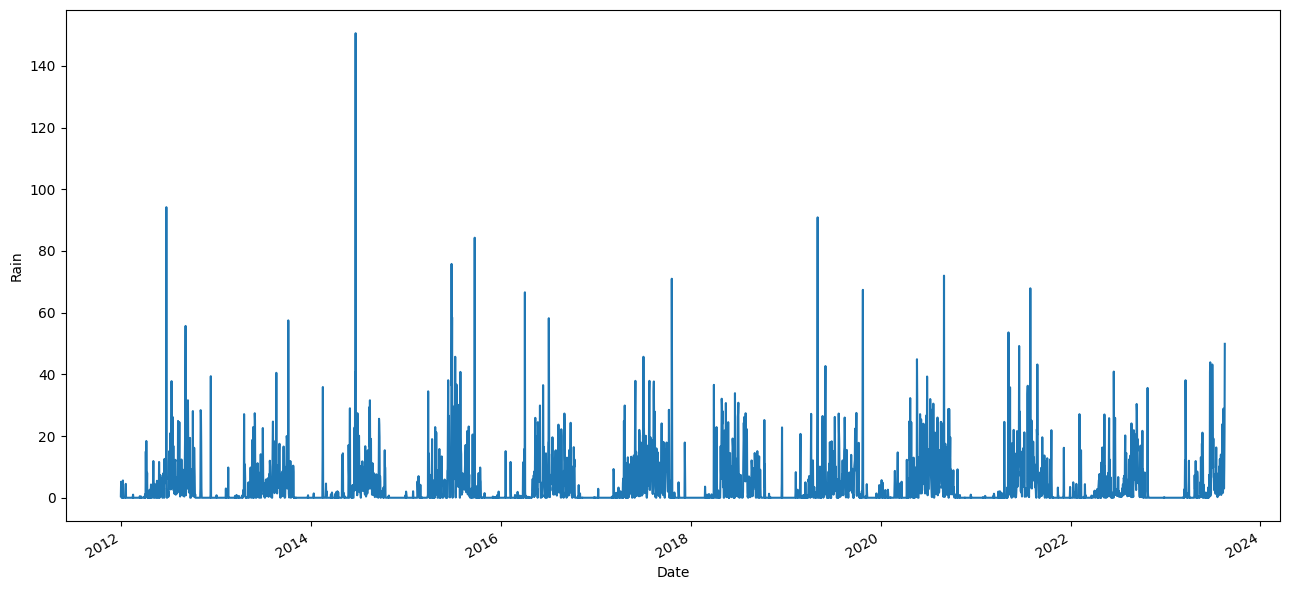

In [28]:
# Plot the Rain
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['rain_sum '])
ax.set_xlabel('Date')
ax.set_ylabel('Rain')

fig.autofmt_xdate()
plt.tight_layout()

Rain is high in the year 2014 in Rajshahi district

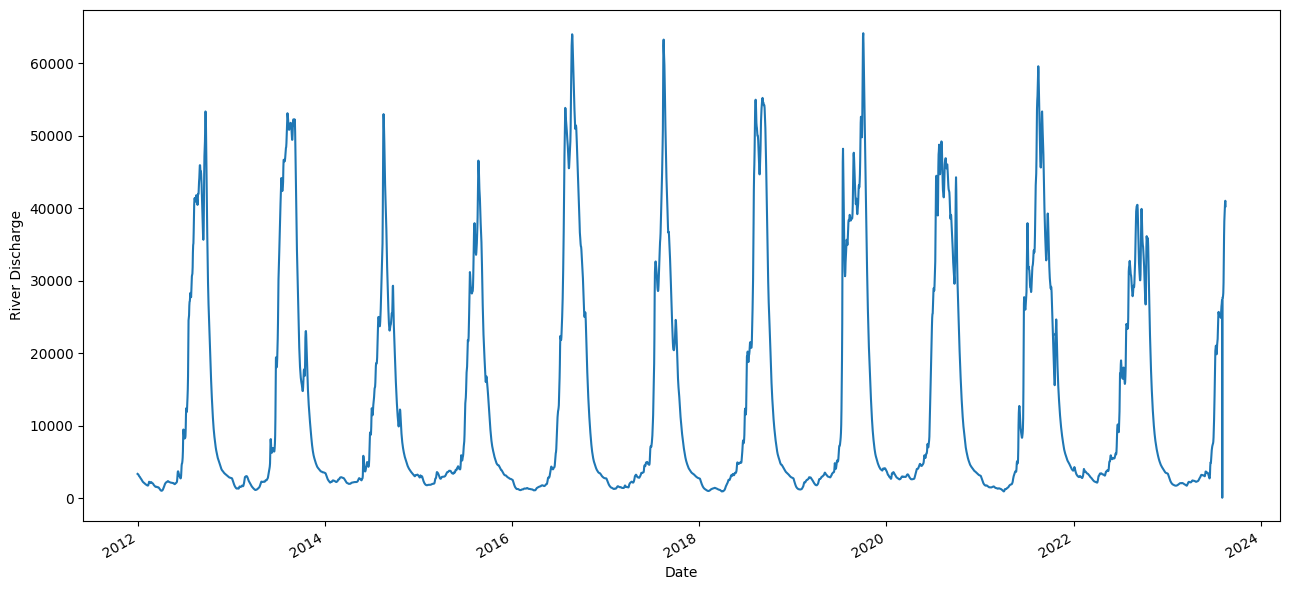

In [29]:
# Plot the River Discharge
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['river_discharge'])
ax.set_xlabel('Date')
ax.set_ylabel('River Discharge')

fig.autofmt_xdate()
plt.tight_layout()

Riverdischarge we can see always high in Rajshahi district

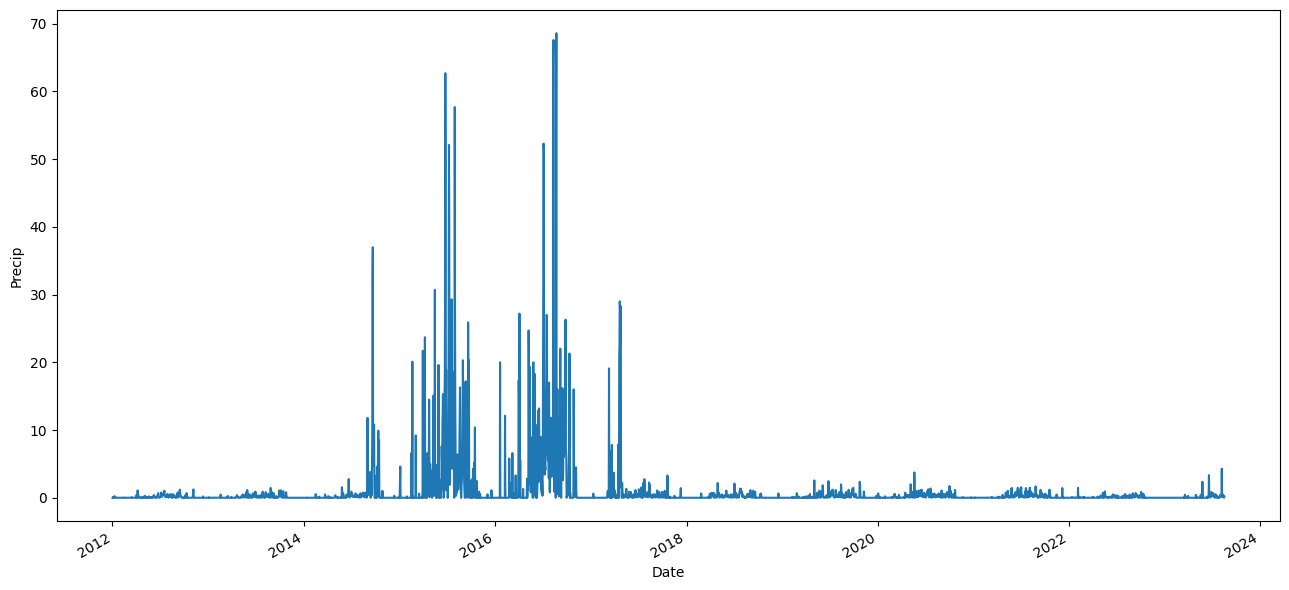

In [30]:
fig, ax = plt.subplots(figsize=(13,6))

ax.plot(df['precip'])
ax.set_xlabel('Date')
ax.set_ylabel('Precip')

fig.autofmt_xdate()
plt.tight_layout()

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,4247.0,76.914575,25.615718,21.4,72.80,87.900,94.0000,114.50
tempmin,4247.0,58.341465,23.067272,5.7,47.00,66.500,78.2000,85.20
temp,4247.0,66.640240,23.960981,13.3,59.25,77.400,84.4000,97.30
feelslikemax,4247.0,84.768731,29.890518,21.4,72.80,91.500,109.8000,135.10
feelslikemin,4247.0,58.891641,23.842748,3.4,44.60,66.500,78.2000,102.50
feelslike,4247.0,70.776666,26.410795,12.8,58.90,77.800,93.2000,110.20
dew,4247.0,55.400895,23.175257,0.6,40.75,60.900,77.3000,82.10
humidity,4247.0,70.668637,16.573725,19.9,59.10,74.800,84.7000,95.50
precip,4247.0,0.980198,4.237787,0.0,0.00,0.016,0.2815,68.60
precipprob,4247.0,53.661408,49.871632,0.0,0.00,100.000,100.0000,100.00


#### Split the dataset in train,validation and test in 70:20:20

In [32]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((2972, 25), (850, 25), (425, 25))

#### Calculate max ,min of river_discharge and rain_sum for train and test set

In [33]:
RD_max_train = np.max(train_df['river_discharge'])
RD_min_train = np.min(train_df['river_discharge'])
RD_max_test = np.max(test_df['river_discharge'])
RD_min_test = np.min(test_df['river_discharge'])

R_max_train = np.max(train_df['rain_sum '])
R_min_train = np.min(train_df['rain_sum '])
R_max_test = np.max(test_df['rain_sum '])
R_min_test = np.min(test_df['rain_sum '])


P_max_train = np.max(train_df['precip'])
P_min_train = np.min(train_df['precip'])
P_max_test = np.max(test_df['precip'])
P_min_test = np.min(test_df['precip'])

In [34]:
print(RD_max_train, RD_min_train, RD_max_test, RD_min_test)
print(R_max_train, R_min_train, R_max_test, R_min_test)
print(P_max_train,P_min_train,P_max_test,P_min_test)

64119.98 947.42 41019.4 77.7
150.6 0.0 49.9 0.0
68.6 0.0 4.297 0.0


#### Scaling Method

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)
test_scaler = MinMaxScaler()
test_scaler.fit(test_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = test_scaler.transform(test_df[test_df.columns])

In [36]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,2972.0,0.537541,0.304187,0.0,0.152009,0.676439,0.773073,1.0
tempmin,2972.0,0.597233,0.315146,0.0,0.250316,0.675095,0.906448,1.0
temp,2972.0,0.571282,0.312698,0.0,0.190419,0.691018,0.844311,1.0
feelslikemax,2972.0,0.513567,0.289480,0.0,0.201591,0.565000,0.780000,1.0
feelslikemin,2972.0,0.522102,0.267788,0.0,0.230930,0.582027,0.773250,1.0
feelslike,2972.0,0.546275,0.299575,0.0,0.222775,0.607330,0.828272,1.0
dew,2972.0,0.617102,0.308122,0.0,0.306748,0.677301,0.933742,1.0
humidity,2972.0,0.685233,0.209616,0.0,0.541005,0.739418,0.862434,1.0
precip,2972.0,0.019406,0.073192,0.0,0.000000,0.000175,0.004854,1.0
precipprob,2972.0,0.525236,0.499447,0.0,0.000000,1.000000,1.000000,1.0


In [37]:
train_df.to_csv("../data/train.csv")
val_df.to_csv("../data/val.csv")
test_df.to_csv("../data/test.csv")